# Loading the libraries

| Platform |
|----------|
| [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/osllmai/inDox/blob/master/cookbook/indoxGen/gan_tensorflow.ipynb) |
| [![GitHub](https://img.shields.io/badge/GitHub-Repository-blue?logo=github)](https://github.com/osllmai/inDox/blob/master/cookbook/indoxGen/gan_tensorflow.ipynb) |


In [1]:
# !pip install indoxGen-tensor

In [2]:
from indoxGen_tensor import TabularGANConfig , TabularGANTrainer

In [ ]:
!wget https://raw.githubusercontent.com/osllmai/inDox/refs/heads/master/cookbook/indoxGen/data/Adult.csv

In [3]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/osllmai/inDox/refs/heads/master/cookbook/indoxGen/data/Adult.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [5]:
# Define categorical, mixed, and integer columns
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country", "income"]
mixed_columns = {"capital-gain": "positive", "capital-loss": "positive"}
integer_columns = ["age", "fnlwgt", "hours-per-week", "capital-gain", "capital-loss"]

In [ ]:
# Set up the configuration
config = TabularGANConfig(
    input_dim=200,  # Noise dimension
    generator_layers=[128, 256, 512],
    discriminator_layers=[512, 256, 128],
    learning_rate=2e-4,
    beta_1=0.5,
    beta_2=0.9,
    batch_size=128,
    epochs=50,
    n_critic=5
)

# Initialize the trainer with the config and column information
trainer = TabularGANTrainer(
    config=config,
    categorical_columns=categorical_columns,
    mixed_columns=mixed_columns,
    integer_columns=integer_columns
)

# Train the model
history = trainer.train(data, patience=15)


Epoch 1/50


In [6]:
# generate synthetic data
synthetic_data = trainer.generate_samples(50000)

In [7]:
synthetic_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,6,117423,11,2,8,0,4,1,0,15,29,39,0
1,52,4,89211,11,2,14,0,4,1,0,20,35,39,0
2,31,4,93537,6,2,7,0,1,1,0,44,38,26,0
3,25,4,291939,15,4,12,3,2,1,37,9,28,39,0
4,29,2,288829,15,4,10,1,4,0,0,0,52,39,0


In [8]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [9]:
data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.870439,1.896641e+05,10.288420,2.618750,6.577700,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.749355,0.239282
std,13.710510,1.464234,1.056040e+05,3.874492,1.507703,4.230509,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.775343,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175505e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.781445e+05,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.376420e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [10]:
synthetic_data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,37.761720,4.110500,182419.035020,12.387460,2.40948,3.02324,1.170160,3.846160,0.674760,850.661760,49.271380,39.830940,38.347520,0.242360
std,11.282167,1.149242,80453.122817,2.470518,1.35143,1.91161,1.434115,0.533834,0.468469,1910.936133,114.720454,8.661599,4.100557,0.428515
min,25.000000,0.000000,84061.000000,1.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000
25%,25.000000,4.000000,100616.750000,11.000000,2.00000,1.00000,0.000000,4.000000,0.000000,0.000000,0.000000,31.000000,39.000000,0.000000
50%,36.000000,4.000000,168245.500000,11.000000,2.00000,3.00000,1.000000,4.000000,1.000000,159.000000,11.000000,39.000000,39.000000,0.000000
75%,51.000000,4.000000,270943.750000,15.000000,4.00000,3.00000,3.000000,4.000000,1.000000,499.000000,25.000000,48.000000,39.000000,0.000000
max,52.000000,7.000000,295267.000000,15.000000,6.00000,14.00000,5.000000,4.000000,1.000000,8531.000000,491.000000,53.000000,39.000000,1.000000


In [11]:
history = trainer.get_training_history()


Utility Metrics Comparison (Real vs. Synthetic):

Classifier: LOGISTICREGRESSION
Accuracy: Real = 80.45, Synthetic = 76.63, Difference = 3.82
AUC: Real = 0.82, Synthetic = 0.75, Difference = 0.07
F1 Score: Real = 0.65, Synthetic = 0.46, Difference = 0.20

Classifier: DECISIONTREE
Accuracy: Real = 81.29, Synthetic = 77.20, Difference = 4.08
AUC: Real = 0.75, Synthetic = 0.62, Difference = 0.13
F1 Score: Real = 0.75, Synthetic = 0.64, Difference = 0.11

Classifier: RANDOMFOREST
Accuracy: Real = 86.24, Synthetic = 80.62, Difference = 5.62
AUC: Real = 0.91, Synthetic = 0.80, Difference = 0.11
F1 Score: Real = 0.80, Synthetic = 0.69, Difference = 0.11

Classifier: MULTILAYERPERCEPTRON
Accuracy: Real = 83.86, Synthetic = 79.38, Difference = 4.47
AUC: Real = 0.89, Synthetic = 0.79, Difference = 0.10
F1 Score: Real = 0.76, Synthetic = 0.60, Difference = 0.16

Statistical Similarity Metrics:
Average Wasserstein Distance (Continuous Columns): 0.0287
Average Jensen-Shannon Divergence (Categorica

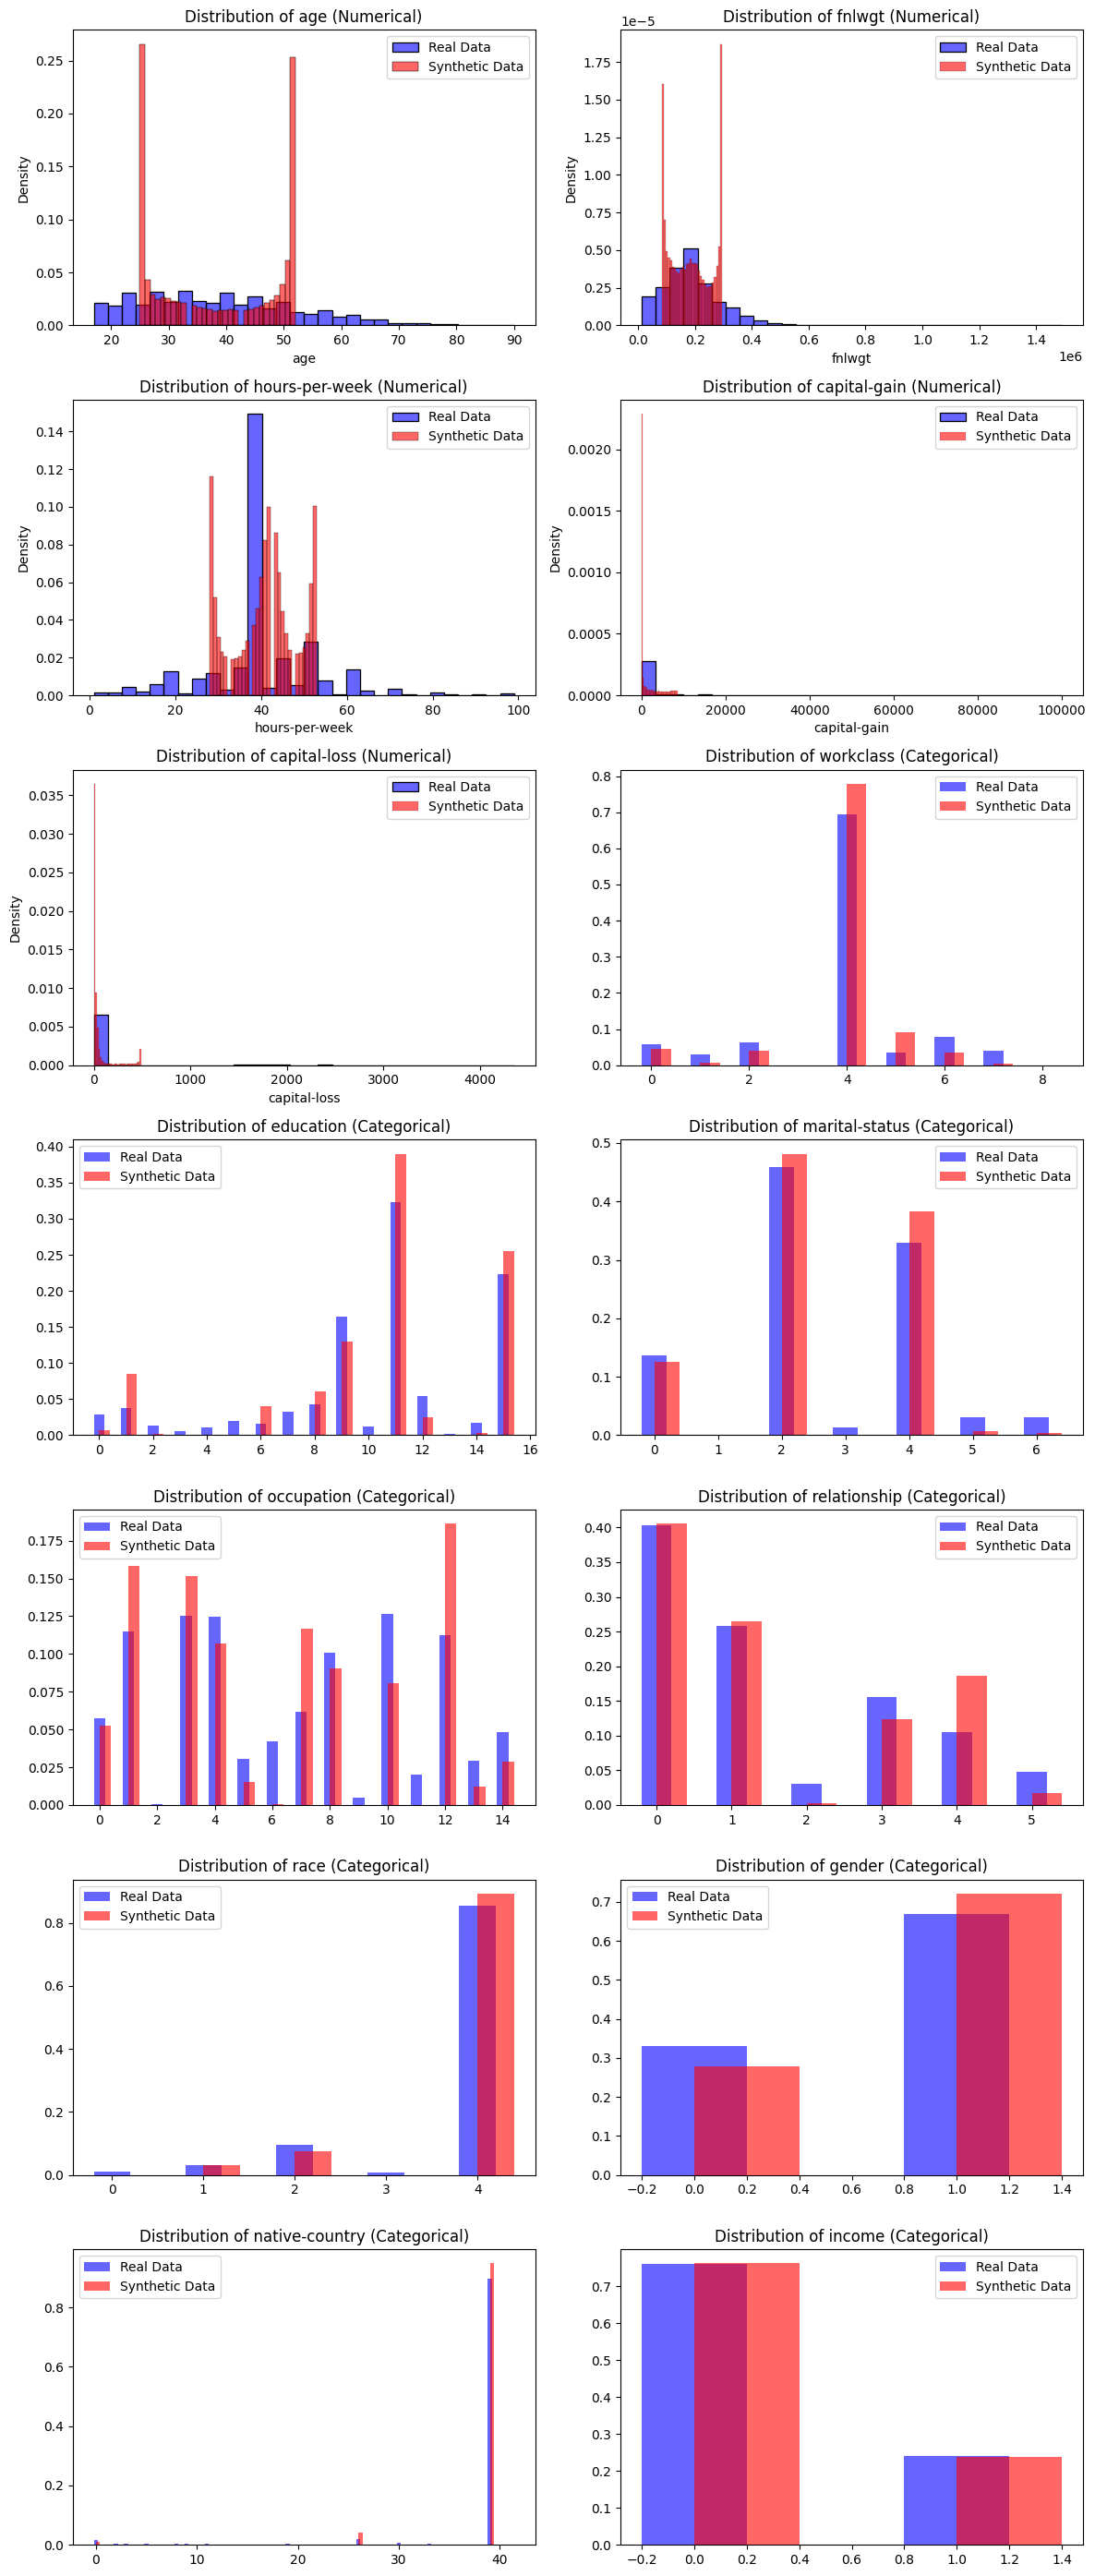

In [10]:
from indoxGen_tensor import  evaluate_utility, evaluate_statistical_similarity, evaluate_privacy, evaluate_data_drift, plot_distributions
# 1. Evaluate Utility
evaluate_utility(data, synthetic_data, classifiers=["LogisticRegression", "DecisionTree", "RandomForest", "MultiLayerPerceptron"])

# 2. Evaluate Statistical Similarity
evaluate_statistical_similarity(data, synthetic_data, cat_cols=categorical_columns)

# 3. Evaluate Privacy
evaluate_privacy(data, synthetic_data)

# 4. Evaluate Data Drift
drift_results = evaluate_data_drift(data, synthetic_data, categorical_columns, integer_columns)
print(drift_results)

# 5. Visualize Distributions
plot_distributions(data, synthetic_data, categorical_columns, integer_columns)

# Interpretation


Here's an interpretation summary of your evaluation comparing real vs. synthetic data performance:

---

### 🔍 **Utility Metrics Summary (Model Performance):**

Across all classifiers, **models trained on real data consistently outperform those trained on synthetic data**, although the gap varies:

- **Logistic Regression** showed the **largest drop in F1 score** (0.20) on synthetic data, indicating poor class balance or predictive performance.
- **Random Forest** had the **highest overall accuracy and AUC** on real data (86.24% and 0.91 respectively), but still saw a notable drop with synthetic data.
- **Multilayer Perceptron (MLP)** and **Decision Tree** also suffered performance losses, particularly in F1 Score, which could suggest class distribution drift or feature interaction loss in synthetic data.

🧠 **Key takeaway:** While synthetic data maintains a *reasonably high* performance level, it’s still **less effective for downstream classification tasks**, especially when precision and recall are critical.

---

### 📊 **Statistical Similarity Summary:**

- **Average Wasserstein Distance (0.0287)** for continuous features indicates **moderate similarity** in numerical distributions.
- **Average Jensen-Shannon Divergence (0.1245)** for categorical features suggests **some divergence**, implying **synthetic categories deviate from the original**.
- **Correlation Distance (2.26)** shows a noticeable **shift in feature relationships**, which can affect model performance, especially for complex models.

🧠 **Key takeaway:** While univariate distributions are decently preserved, **inter-feature relationships and categorical distributions** diverge more significantly.

---

### 🔒 **Privacy Metrics Summary:**

- **Distance to Closest Record (DCR):**
  - DCR between real and synthetic data (0.5663) is significantly higher than within-real (0.2165) and within-synthetic (0.0524), indicating that **synthetic records are not overly similar to any single real record**, which is good for privacy.
- **Nearest Neighbor Distance Ratio (NNDR):**
  - NNDR between real and synthetic (0.7490) is also **higher than intra-group values**, further supporting **reduced re-identification risk**.

🧠 **Key takeaway:** **Privacy is well-preserved** in synthetic data, with minimal risk of replicating real individuals.

---

### ⚠️ **Data Drift Overview:**

- **Detected drift** in most features, especially:
  - `workclass`, `education`, `occupation`, and key numerical variables like `age`, `fnlwgt`, `capital-gain`, `hours-per-week`
- **No significant drift** in `race`, `gender`, and `income` (target variable), which is encouraging for fairness and downstream task evaluation.

🧠 **Key takeaway:** **Widespread feature drift exists**, which likely explains the performance drop in ML models trained on synthetic data. However, the **stability of the target variable (`income`) is a positive sign.**

---

### ✅ **Overall Interpretation:**

- **Synthetic data is reasonably useful**, with acceptable model performance and good privacy preservation.
- However, **utility is compromised**, especially for more sensitive classifiers like Logistic Regression or F1 Score–dependent tasks.
- **Data drift is a key issue** — improving synthesis methods to better capture inter-feature relationships and categorical fidelity could narrow the performance gap.





## Join Us

Join us in exploring how Indox can revolutionize your document processing workflow, bringing clarity and organization to your data retrieval needs. Connect with us and become part of our growing community through the platforms below:

## Community

- [Discord](https://discord.com/invite/xGz5tQYaeq)
- [X (Twitter)](https://x.com/osllmai)
- [LinkedIn](https://www.linkedin.com/company/osllmai/)
- [YouTube](https://www.youtube.com/@osllm-rb9pr)
- [Telegram](https://t.me/osllmai)


*Reviewed by: Ali Nemati - March, 22, 2025*